# 1. Data Import and Exploration

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import pickle
import sklearn
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [4]:
df=pd.read_csv('D:\ds_intern\credit card-AssignmentData.csv')

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  object 
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  object 
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  object 
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V3,V4,V5,V6,V8,V10,V11,V12,...,V20,V21,V22,V23,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.892178e-12,-5.144458e-13,1.253982e-12,6.423627e-14,3.609484e-13,-3.217302e-13,1.111579e-12,1.176732e-12,7.207736e-13,...,8.170471e-13,-1.191675e-12,-3.221715e-13,9.448729e-14,-6.603482e-13,9.206550e-14,4.588300e-13,-1.252805e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.194353e+00,1.088850e+00,1.020713e+00,9.992014e-01,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-7.321672e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-2.086297e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,2.235804e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,3.273459e-01,4.539234e-01,7.395934e-01,6.182380e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,2.000721e+01,2.374514e+01,1.201891e+01,7.848392e+00,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.duplicated().sum()

np.int64(1081)

In [9]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of           Time        V1        V2        V3        V4        V5        V6  \
0            0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2            1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3            1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...        ...       ...       ...       ...       ...       ...       ...   
284802  169142 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
284803  169347  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
284804  169351 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
284805  169966 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
284806  170348  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

                  V7

In [10]:
df.shape

(284807, 31)

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239598554,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928075,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078802983,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846476,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791460956,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689280956,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.23760894,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575332,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592940745,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141266984,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [14]:
class_distribution = df['Class'].value_counts()
class_distribution

Class
0    284315
1       492
Name: count, dtype: int64

In [15]:
amount_distribution = df['Amount'].describe()
amount_distribution

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

**Handling the mixed data type columns by converting them to numeric where possible**

In [16]:

df_cleaned = df.copy()
columns=df_cleaned.columns;
for col in columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

In [17]:
df_cleaned

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,169142,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
284803,169347,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
284804,169351,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
284805,169966,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## 1.2 EDA

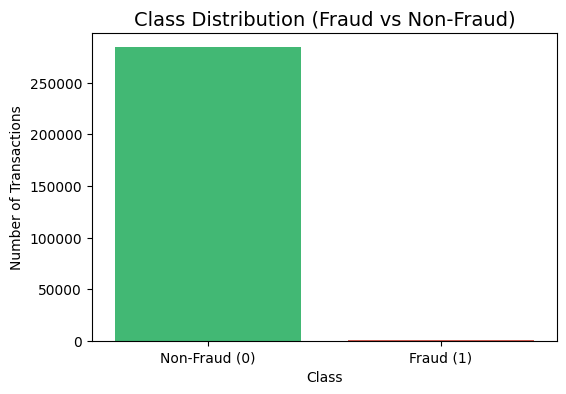

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df_cleaned, palette=['#2ecc71', '#e74c3c'])
plt.title('Class Distribution (Fraud vs Non-Fraud)', fontsize=14)
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.show()


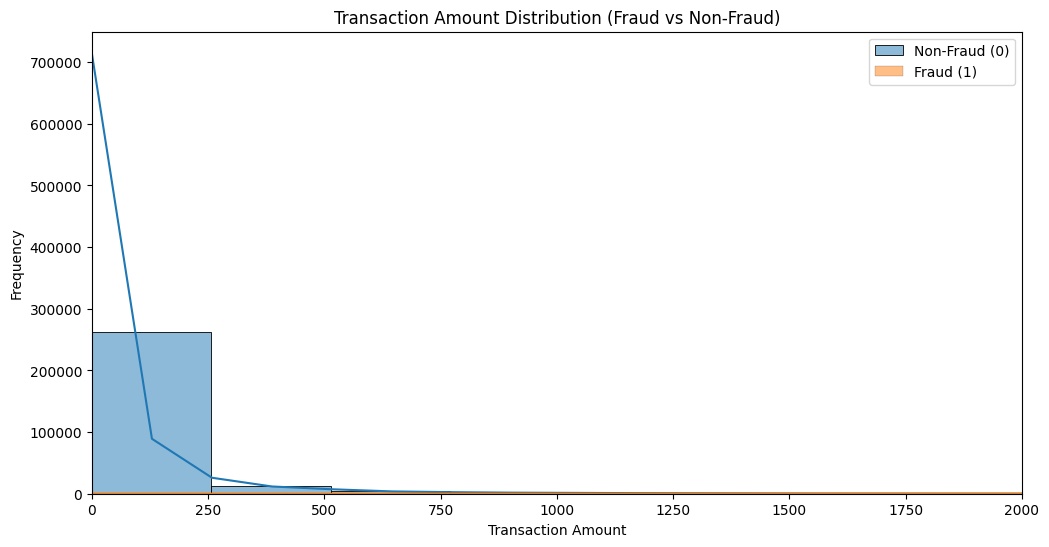

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned[df_cleaned['Class'] == 0]['Amount'], bins=100, label='Non-Fraud (0)', kde=True)
sns.histplot(df_cleaned[df_cleaned['Class'] == 1]['Amount'], bins=50, label='Fraud (1)', kde=True)
plt.title('Transaction Amount Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.xlim([0, 2000])
plt.show()

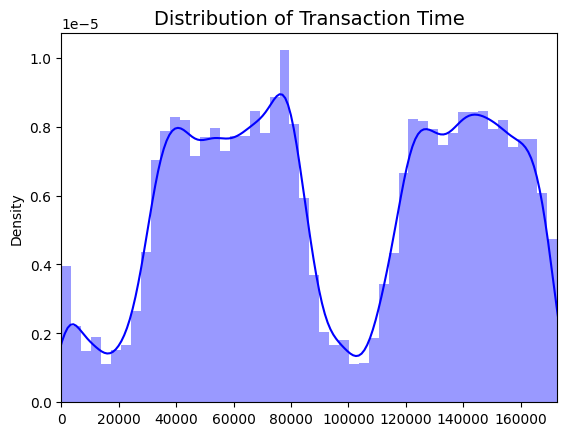

In [20]:
time_val = df_cleaned['Time'].values
sns.distplot(time_val, color='b')
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlim([min(time_val), max(time_val)])
plt.show()

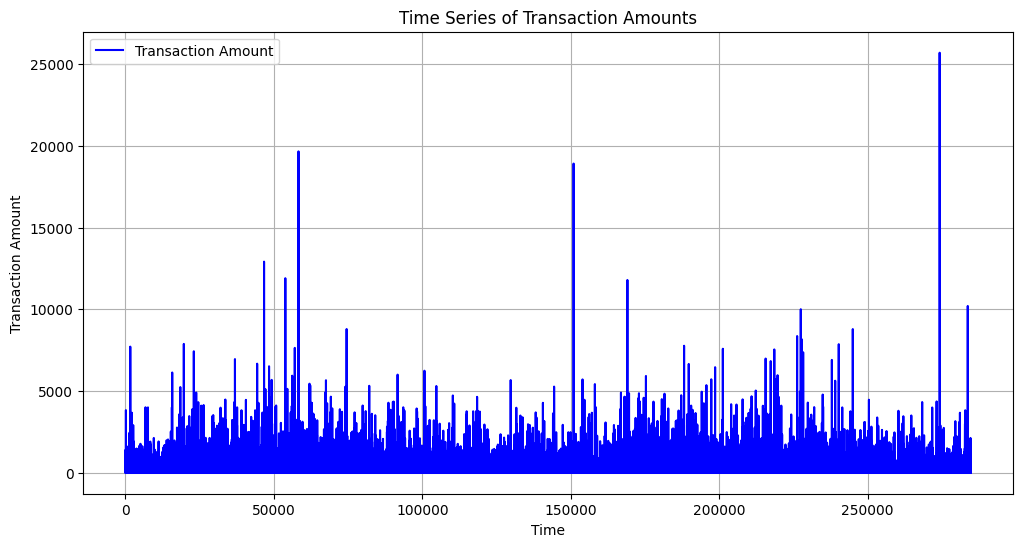

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Amount'], label='Transaction Amount', color='blue')
plt.title('Time Series of Transaction Amounts')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
df_cleaned.dropna(inplace=True)

# 2. Feature Engineering

**Here we are using Standardization for scaling the data columns amount and Time because standardization handles data with outliers more effectively**

In [23]:
scaler = StandardScaler()
df_cleaned[['Time', 'Amount']] = scaler.fit_transform(df_cleaned[['Time', 'Amount']])

## 2.2 Applying PCA 

In [24]:
pca = PCA(n_components=2)

In [25]:
# Selecting only the relevant columns for PCA ('V1' to 'V28', 'Time', 'Amount')
pca_features = df_cleaned.drop(columns=['Class']).values

In [26]:
# Transforming the data
pca_transformed = pca.fit_transform(pca_features)

**Create a DataFrame with the PCA results and the Class column for visualization**

In [27]:
pca_df = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2'])
pca_df['Class'] = df_cleaned['Class']

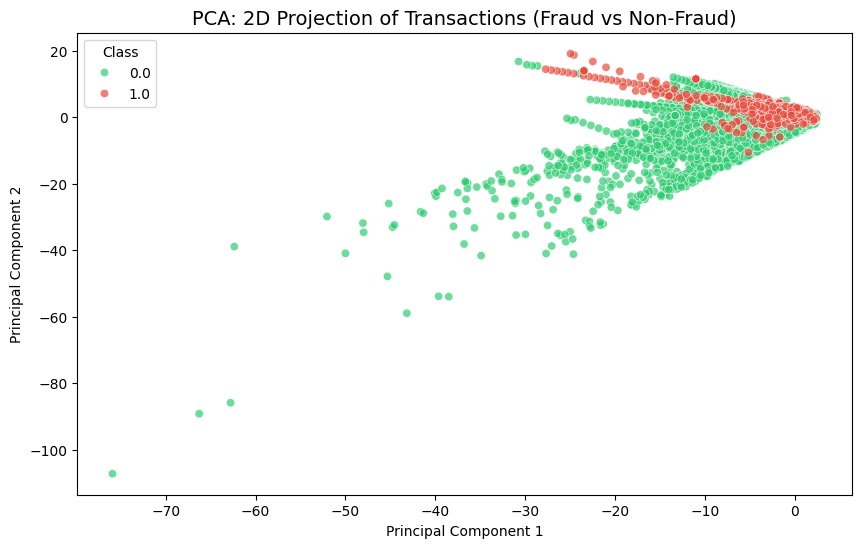

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette=['#2ecc71', '#e74c3c'], alpha=0.7)
plt.title('PCA: 2D Projection of Transactions (Fraud vs Non-Fraud)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [29]:
pca_df['Class'].value_counts()

Class
0.0    284310
1.0       487
Name: count, dtype: int64

In [30]:
pca_df.dropna(inplace=True)

# Anomaly Detection models

In [31]:
X = pca_df.drop(columns=['Class']).values
y = pca_df['Class'].values  

## 3.1.a Isolation Forest

In [32]:
iso_forest = IsolationForest(contamination=0.0017, random_state=42)  # Contamination roughly equals to the proportion of frauds
iso_forest.fit(X)
y_pred_iso = iso_forest.predict(X)
y_pred_iso = [1 if pred == -1 else 0 for pred in y_pred_iso]  # Anomalies are labeled as -1

In [33]:
print("len of data",len(y_pred_iso))
unique_elements = list(set(y_pred_iso))

# Print unique elements
print("Unique elements:", unique_elements)
num_ones = y_pred_iso.count(1)

# Print the result
print("Number of 1s in the list:", num_ones)

len of data 284797
Unique elements: [0, 1]
Number of 1s in the list: 485


## 3.1.b Local Outlier Factor (LOF)

In [34]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0017, novelty=True)
lof = lof.fit(X)
y_pred_lof=lof.predict(X)
y_pred_lof = [1 if pred == -1 else 0 for pred in y_pred_lof]  # Anomalies are labeled as -1

In [35]:
print("len of data",len(y_pred_lof))
unique_elements = list(set(y_pred_lof))

# Print unique elements
print("Unique elements:", unique_elements)
num_ones =y_pred_lof.count(1)

# Print the result
print("Number of 1s in the list:", num_ones)

len of data 284797
Unique elements: [0, 1]
Number of 1s in the list: 408


## 3.3 Evaluating both models

In [36]:
# Isolation Forest Evaluation
precision_iso, recall_iso, f1_iso, _ = precision_recall_fscore_support(y, y_pred_iso, average='binary')
roc_auc_iso = roc_auc_score(y, y_pred_iso)

# Local Outlier Factor (LOF) Evaluation
precision_lof, recall_lof, f1_lof, _ = precision_recall_fscore_support(y, y_pred_lof, average='binary')
roc_auc_lof = roc_auc_score(y, y_pred_lof)

In [37]:
# Results for both models
iso_results = {
    'Precision': precision_iso,
    'Recall': recall_iso,
    'F1-Score': f1_iso,
    'ROC-AUC': roc_auc_iso
}

lof_results = {
    'Precision': precision_lof,
    'Recall': recall_lof,
    'F1-Score': f1_lof,
    'ROC-AUC': roc_auc_lof
}

iso_results, lof_results


({'Precision': np.float64(0.0),
  'Recall': np.float64(0.0),
  'F1-Score': np.float64(0.0),
  'ROC-AUC': np.float64(0.4991470577890331)},
 {'Precision': np.float64(0.061274509803921566),
  'Recall': np.float64(0.0513347022587269),
  'F1-Score': np.float64(0.055865921787709494),
  'ROC-AUC': np.float64(0.5249937905792597)})

# 4 Visualizing Anomalies

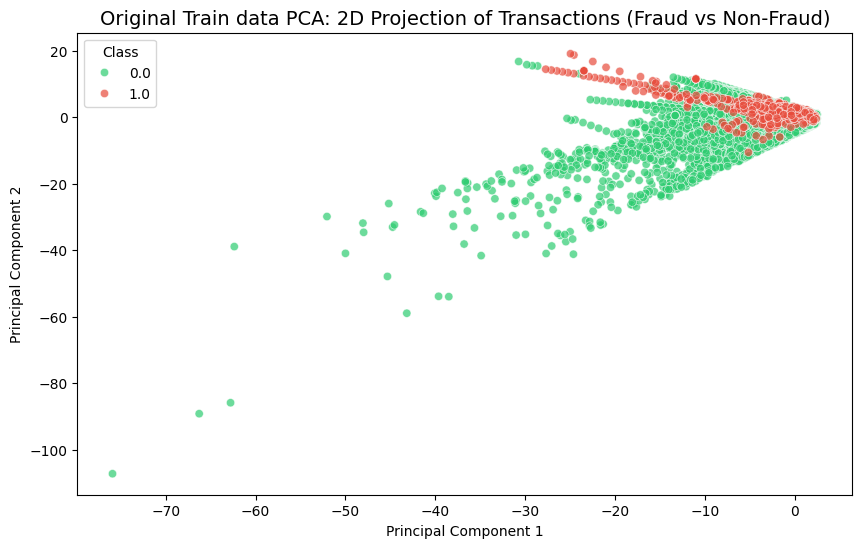

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette=['#2ecc71', '#e74c3c'], alpha=0.7)
plt.title('Original Train data PCA: 2D Projection of Transactions (Fraud vs Non-Fraud)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

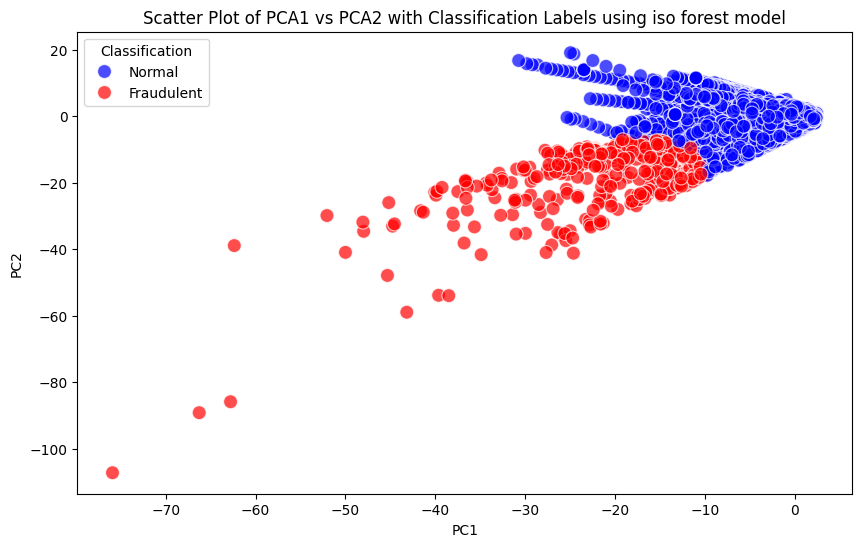

In [39]:
df_X = pd.DataFrame(X, columns=['PC1', 'PC2'])
y_pred_df = pd.DataFrame(y_pred_iso, columns=['Y'])  # Add classification labels

df_plot = pd.concat([df_X, y_pred_df], axis=1)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Y',
                palette={0: 'blue', 1: 'red'}, alpha=0.7, s=100)

# Add labels and title
plt.title('Scatter Plot of PCA1 vs PCA2 with Classification Labels using iso forest model')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Correct the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Normal', 'Fraudulent'], title='Classification')

plt.show()


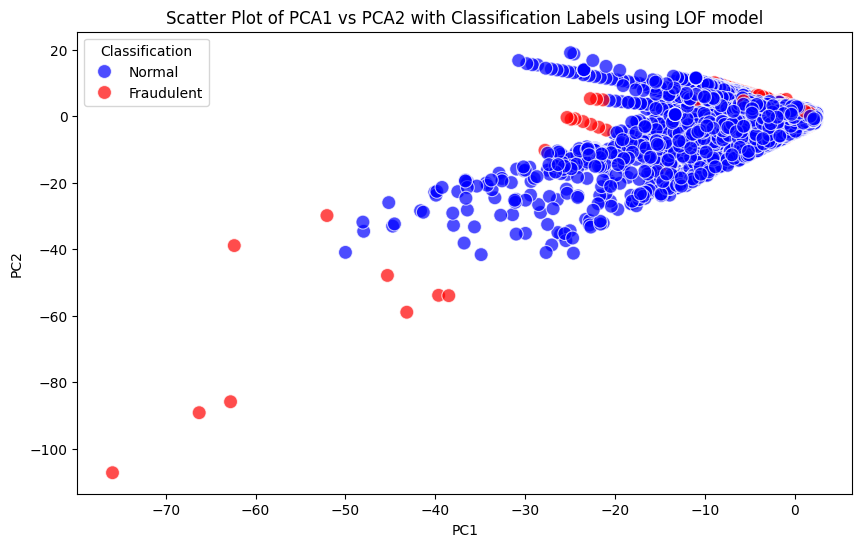

In [40]:
df_X = pd.DataFrame(X, columns=['PC1', 'PC2'])
y_pred_df = pd.DataFrame(y_pred_lof, columns=['Y'])  # Add classification labels

df_plot = pd.concat([df_X, y_pred_df], axis=1)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Y',
                palette={0: 'blue', 1: 'red'}, alpha=0.7, s=100)

# Add labels and title
plt.title('Scatter Plot of PCA1 vs PCA2 with Classification Labels using LOF model')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Correct the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Normal', 'Fraudulent'], title='Classification')

plt.show()


# 5 Function

## Function for the above that accept new data and make prediction

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def detect_fraudulent_transactions(new_data: pd.DataFrame, model):
    columns=new_data.columns;
    for col in columns:
        new_data[col] = pd.to_numeric(new_data[col], errors='coerce')
    new_data.dropna(inplace=True)
    new_data[['Time', 'Amount']] = scaler.transform(new_data[['Time', 'Amount']])
    pca_features = new_data.values
    pca_transformed = pca.transform(pca_features)
    pca_df = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2'])
    X = pca_df.values
    y_pred_model = model.predict(X)
    y_pred_model = [1 if pred == -1 else 0 for pred in y_pred_model]
    #fraudulent_transactions = pca_df[y_pred_model == 1]

    return y_pred_model




In [42]:
pickle.dump(lof,open('lof.pkl','wb'))

In [43]:
pickle.dump(iso_forest,open('iso_forest.pkl','wb'))

In [45]:
with open("D:\ds_intern\scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)

with open("D:\ds_intern\pca.pkl", 'wb') as file:
    pickle.dump(pca, file)